In [6]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [35]:
print(len(train_labels))

60000


In [5]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
extract_ratio = [0.7, 0.5, 0.9, 0.8, 0.7, 0.6, 0.9, 0.8, 1.0, 0.7]
X_extracted = []
y_extracted = []
for i, label in enumerate(np.unique(train_labels)):
    y_single_label = train_labels[train_labels==label]
    X_single_label = train_images[train_labels==label]
    rnd_idx_single_label = np.random.permutation(len(y_single_label))
    extract_num = int(len(y_single_label)*extract_ratio[i])
    y_single_label = y_single_label[rnd_idx_single_label[:extract_num]]
    X_single_label = X_single_label[rnd_idx_single_label[:extract_num]]
    
    y_extracted.append(y_single_label)
    X_extracted.append(X_single_label)

In [18]:
X_train = np.array(X_extracted)

In [57]:
X_train = X_extracted[0]
y_train = y_extracted[0]
for X_ele, y_ele in zip(X_extracted[1:], y_extracted[1:]):
    X_train = np.r_[X_train, X_ele]
    y_train = np.r_[y_train, y_ele]

In [58]:
print(X_train.shape)
print(y_train.shape)

(45477, 28, 28)
(45477,)


(array([4146., 3371., 5362., 4904., 4089., 3252., 5326., 5012., 5851.,
        4164.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

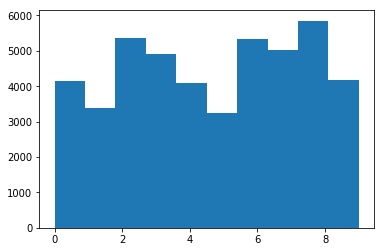

In [59]:
plt.hist(y_train)

In [71]:
np.savez('./my_comp_train_XY', X_train, X=X_train, y=y_train)

In [72]:
npz = np.load('./my_comp_train_XY.npz')

In [75]:
# 展開
X_train = npz['X']
y_train = npz['y']

(45477, 28, 28)